Neural Networks (Deep Learning)
===

Deep learning algorithms are often tailored to a specific use case.  Here we discuss only relatively simple methods.  Multi-layer perceptrons (MLPs) are also known as vanilla feed-forward neural networks, sometimes just neural networks.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to arrive at a decision.

A linear regressor is given as:

In [2]:
# y = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

We could visualize this graphically as:

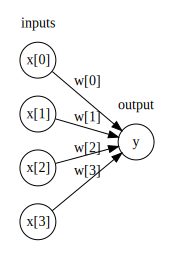

In [15]:
%matplotlib inline
import mglearn
from IPython.display import display

display(mglearn.plots.plot_logistic_regression_graph())

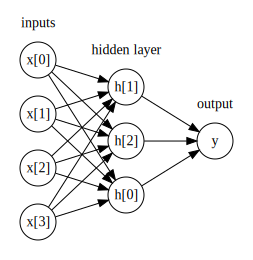

In [16]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Computing a series of weighted sums is mathematically the same as computing just one weighted sum, so to make this model more powerful than a linear model, a non-linear function is applied to result -- usually the *rectifying nonlinearity* (rectified linear unit or relu) or the *tangens hyperbolicus* (tanh).  The result of this function is then used in the weighted sum that computes the output y.

The relu cuts off values below zero while tanh saturates to -1 for low input values and 1 for high input values.  Either nonlinear function allows the NN to learn much more complicated functions than a linear model could.

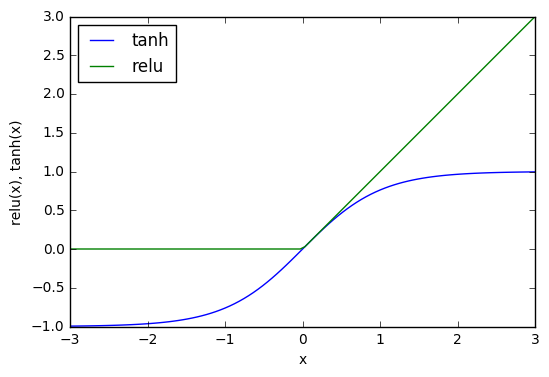

In [21]:
import matplotlib.pyplot as plt
import numpy as np

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

For the small neural network pictured above, the full formula for computing y in the case of regression and using tanh nonlinearity would be:

In [22]:
# h[0] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])
# h[1] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])
# h[2] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])
# y = v[0] * h[0] +v[1] * h[1] + v[2] + h[2]

where w is the weight between the input x and the hidden layer h, and v is the weight between the hidden layer h and the output y.  The weights v and w are learned from data, x are the input features, y is the computed output, and h are intermediate computations.

An important parameter that needs to be set by the user is the number of nodes in the hidden layer.  This can be as small as 10 for very small or fimple datasets and as big as 10,000 for very complex data.  It is also possible to add additional hidden layers.

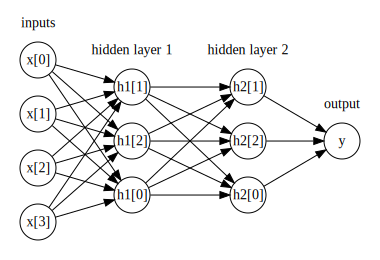

In [23]:
mglearn.plots.plot_two_hidden_layer_graph()

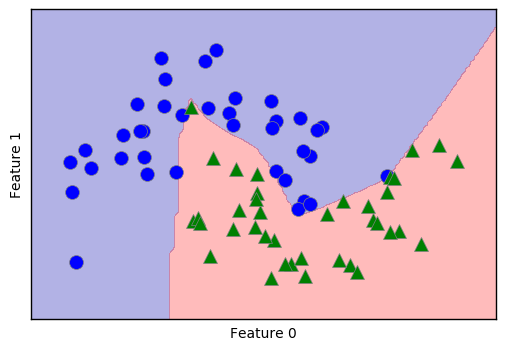

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples = 100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

By default, MLP uses a 100 different nodes, which is a lot for this small dataset.  We can reduce the complexity and still get a good result.

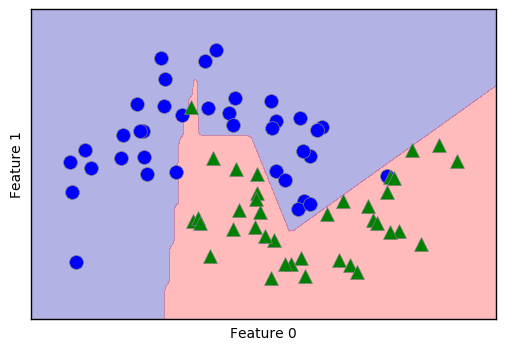

In [34]:
mlp10 = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp10.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp10, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The default nonlinearity is relu.  With a single hidden layer, this means the decision function will be made up of 10 straight line segments.  If we want a smoother decision boundary, we could add more hidden units, add a second hidden layer, or use the tanh nonlinearity.

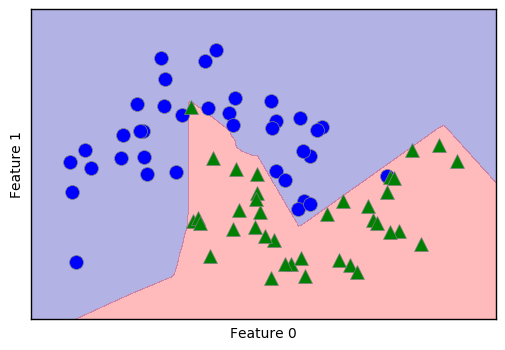

In [35]:
mlp2layer = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp2layer.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp2layer, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

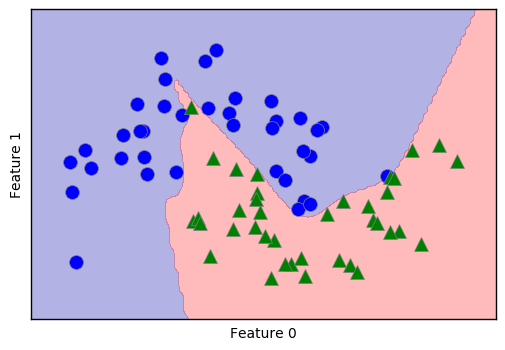

In [36]:
mlp_2layer_tanh = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10], activation='tanh')
mlp_2layer_tanh.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp_2layer_tanh, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

We can also control the complexity of a neural network by using an l2 penalty to shrink the weights towards zero as we did in ridge regression and linear classifiers.  The parameter for this in the MLPClassifier is alpha, and it defaults to a very low value.

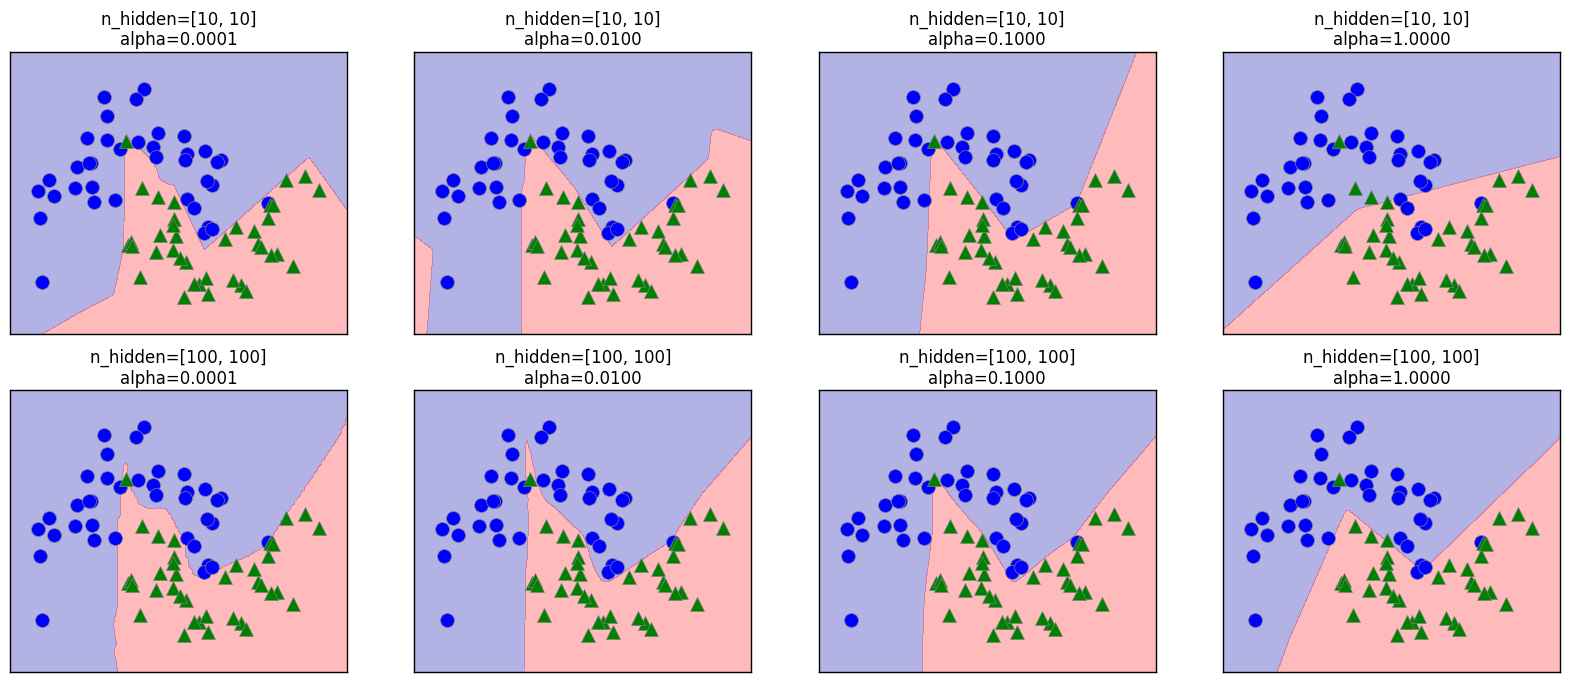

In [40]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

In [42]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.88


The accuracy of the MLP is quite good, but not as good as the other models.  As in the earlier SVC example, this is likely due to scaling of the data.  Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0 and a variance of 1.

In [49]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the std dev of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean and scale by inverse std dev to get mean=0, std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use the SAME transformation on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/Users/nathaniel/Desktop/ml/intro-to-ml-with-python/venv/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [50]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.972


In [51]:
# aggressively increasing the alpha
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


This leads to a performance on par with the best models so far.

Much harder to analyze what a neural network has learned, but one method is to look at the weights.

In the following plot, we look at weights that were learned connecting the input to the first hidden layer.  The rows correspond to the 30 input features, the columns correspond to the 100 hidden units.  Light colors represent large positive values, dark colors represent negative values.

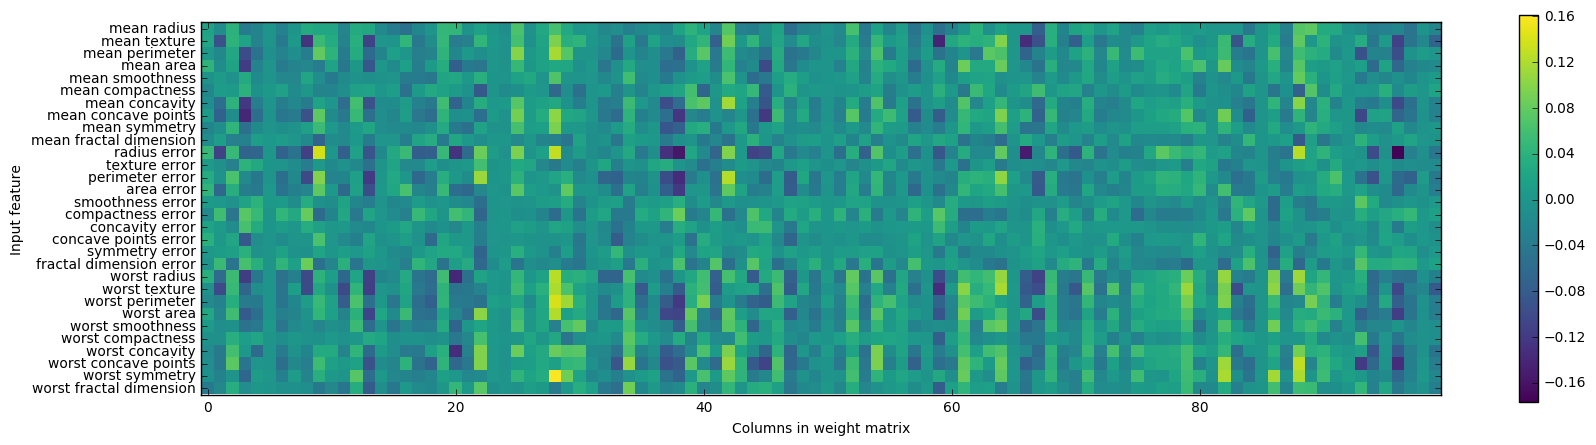

In [52]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

One inference we can make is that features that have very small weights for all of the hidden units are "less important" to the model.  Features "mean smoothness" and "mean compactness", and the features between "smoothness error" and "fractal dimension error", have relatively low weights.  This could either mean these features are less important, or they were not represented in a way that the NN could use.

Strengths, weaknesses, and parameters
---

One of NN main advantages is that they are able to capture information contained in large amounts of data and build incredibly complex models.  Given enough computation time, data, and careful tuning of the parameters, NN often beat other machine learning algorithms for classification and regression.

NN often take a long time to train.  They also require careful pre-processing of the data.  Similar to SVMs, they work best with homogenous data.  For data that has very different kinds of features, tree-based models may work better.  Tuning NN parameters is also an art unto itself.

Estimating complexity in NN
---

A common way to adjust parameters in a NN is to first create a network that is large enough to overfit, making sure that the task can actually be learned by the network.  Then, either shrinking the network or increasing alpha to add regularization, which will improve generalization performance.

There are two easy to use choices for the algorithm.  The default is "adam", which works well in most situations but is quite sensitive to the scaling of the data (need 0 mean and unit variance).  The other is "l-bfgs", which is quite robust but may take a long time on larger models or datasets.  There is also the more advanced "sgd"